# 1. KNN Nearest Algorithm

## Exact Version

## 1. Imports

In [1]:
import numpy as np
from sklearn.datasets import make_classification

In [2]:
# Create a lookup table for squares
squares = np.arange(256)**2

# Create Adder
Adder_Exact = np.arange(-256, 256)[:, np.newaxis] + np.arange(-256, 256)

# Square Root Lookup Table
square_root = np.sqrt(np.arange(0, 255))

def lookup_table_adder(a, b):
    return [Adder_Exact[ai + 256, bi + 256] for ai, bi in zip(a, b)]


def lookup_table_squares(a):
    return squares[a]

def lookup_table_diff(a, b):
    return lookup_table_adder(a, -b)

def lookup_table_square_root(a):
    return square_root[lookup_table_adder(a, a)]




def euclidean_distance_lookup(a, b):
    diff = lookup_table_diff(a, b)
    square_diff = lookup_table_squares(diff)
    sum_square_diff = lookup_table_adder(square_diff, square_diff)
    return float(lookup_table_square_root(sum_square_diff))

def euclidean_distance(a, b):
    diff = a-b
    square_diff = diff**2
    sum_square_diff = np.sum(square_diff,axis=1)
    return np.sqrt(sum_square_diff)

# Convert numbers to NumPy arrays
a = np.array([5])
b = np.array([1])

# Calculate Euclidean distance
#print("Euclidean distance for Numpy ",euclidean_distance(a, b))
#print("Euclidean distance for Lookup ",euclidean_distance_lookup(a, b))



In [3]:
def kneighbors(X_test,X_train, return_distance=False,type='numpy'):
       # Nearest Neighbors to each Test Datapoint
        n_neighbors = 5
        dist = []
        neigh_ind = []
        number = 0
        point_dist = []
        
        for x_test in X_test:
            number +=1
            if type == 'numpy':
                # Your code here
                distance = euclidean_distance(x_test, X_train)
            if type =='lookup':
                distance = euclidean_distance_lookup(x_test,X_train)

            print(f"Processed element: {number}")
            point_dist.append(distance)

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:n_neighbors]
    
            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]
    
            dist.append(dist_list)
            neigh_ind.append(ind_list)
        
        if return_distance:
            return np.array(dist), np.array(neigh_ind)
        
        return np.array(neigh_ind)

def predict(X_test, X_Train, y_train, weights='uniform',type=type):
    class_num = 10

    if weights == 'uniform':
        neighbors = kneighbors(X_test, X_Train,type=type)
        y_pred = np.array([np.argmax(np.bincount(y_train[neighbor])) for neighbor in neighbors])
        return y_pred

    if weights == 'distance':
        dist, neigh_ind = kneighbors(X_test, X_Train, return_distance=True)
        inv_dist = 1 / dist
        mean_inv_dist = inv_dist / np.sum(inv_dist, axis=1)[:, np.newaxis]
        proba = []

        for i, row in enumerate(mean_inv_dist):
            row_pred = y_train[neigh_ind[i]]
            for k in range(class_num):
                indices = np.where(row_pred == k)
                prob_ind = np.sum(row[indices])
                proba.append(np.array(prob_ind))

        predict_proba = np.array(proba).reshape(X_test.shape[0], class_num)
        y_pred = np.array([np.argmax(item) for item in predict_proba])
        return y_pred


def score_knn(X_test, y_test, X_train, y_train,type='numpy'):
    y_pred = predict(X_test, X_train, y_train, weights='distance',type=type)
    return float(sum(y_pred == y_test)) / float(len(y_test))
        


In [21]:
# random classification set
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3, random_state=21)

mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X - mu ) / sigma

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## use mnist as classification dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y.astype(np.int8)
subset_size = 200000
X_subset, y_subset = X[:subset_size], y[:subset_size]

# Split the subset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

X_train = X_train.to_numpy(dtype='uint8')
X_test = X_test.to_numpy(dtype='uint8')
y_train = y_train.to_numpy(dtype='uint8')
y_test = y_test.to_numpy(dtype='uint8')

print(X_train[0])
print(y_train[0])

# Print statistics about the data
print("Number of training examples:", X_train.shape[0])
print("Number of testing examples:", X_test.shape[0])
print("Number of features:", X_train.shape[1])  # Assuming all samples have the same number of features
print("Number of classes:", len(set(y)))  # Count unique classes in the target variable



[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26 255  90   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  26  26   0  13  64 138 180 199  11   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  41 224 232 207 221 253 242 162  17
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 195 253 210 160 161 111  38   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 151 236  50   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  38 247 134   0   0   0   0   0   0   0   0   

Shape of X_train: (56000, 784)
Shape of y_train: (56000,)


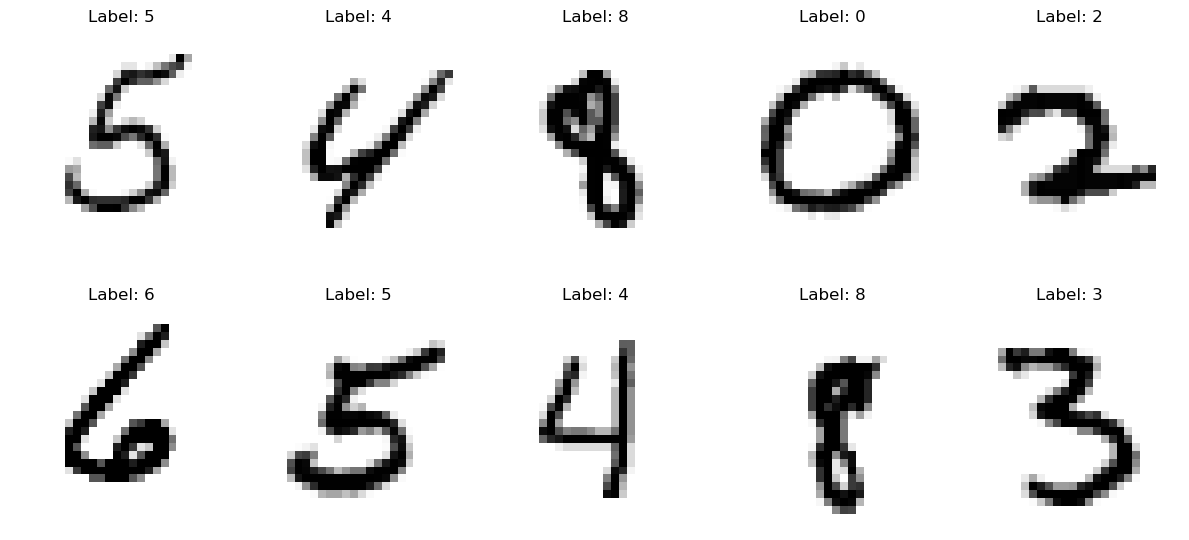

In [23]:
import matplotlib.pyplot as plt

# Check the shape of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Visualize the first 10 samples of the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < len(X_train):
        ax.imshow(X_train[i].reshape(28, 28), cmap='binary')
        ax.set_title(f"Label: {y_train[i]}")
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off the axis for empty subplots

plt.tight_layout()
plt.show()


In [5]:

#kneighbors(X_test,X_train,True,type='numpy')


In [25]:

#predict(X_test,X_train,y_train,type='numpy')


In [6]:
score_knn(X_test,y_test,X_train,y_train,type='lookup')

Processed element: 1
Processed element: 2
Processed element: 3
Processed element: 4
Processed element: 5
Processed element: 6
Processed element: 7
Processed element: 8
Processed element: 9
Processed element: 10
Processed element: 11
Processed element: 12
Processed element: 13
Processed element: 14
Processed element: 15
Processed element: 16
Processed element: 17
Processed element: 18
Processed element: 19
Processed element: 20
Processed element: 21
Processed element: 22
Processed element: 23
Processed element: 24
Processed element: 25
Processed element: 26
Processed element: 27
Processed element: 28
Processed element: 29
Processed element: 30
Processed element: 31
Processed element: 32
Processed element: 33
Processed element: 34
Processed element: 35
Processed element: 36
Processed element: 37
Processed element: 38
Processed element: 39
Processed element: 40
Processed element: 41
Processed element: 42
Processed element: 43
Processed element: 44
Processed element: 45
Processed element: 

KeyboardInterrupt: 

In [ ]:
score_knn(X_test,y_test,X_train,y_train,type='numpy')

## Approximated Version of KNN Algorithm on MNIST

### Approximated Adder Block

In [10]:
#In 8 Bit Adder, lower 3 bits are implemented approximated. Higher 5 Bit calculate exact
def My_8BitAdder(a,b,approx_until=3):
    # convert to binary
    a_bin, b_bin = bin(a), bin(b)

    #reverse order of bytes for the adder
    rev_a , rev_b = list(a_bin[::-1]), list(b_bin[::-1])
        
    carry_over  = 0
    total_sum   = 0

    for index, (bit1,bit2) in enumerate ( zip(rev_a,rev_b)):

        if index < approx_until:
            #use approx_adder
            sum_element, carry_over = ApproxAdder(int(bit1), int(bit2), int(carry_over))
        else:
            #use exact_adder
            sum_element, carry_over = ExactAdder(int(bit1), int(bit2), int(carry_over))
    
        total_sum += pow(2,index)*sum_element
    total_sum += pow(2,index+1)*carry_over
    return total_sum

def ApproxAdder(a,b,c):
    return

def ExactAdder(a,b,c):
    return


My_8BitAdder(3,3)

    


TypeError: cannot unpack non-iterable NoneType object